# Fumiya Hayakawa

## Fumiya’s Research Interest: Consumer behavior and price sensitivity 

**Research Question: To what extent does inflation affect the behaviour of consumers?**

My research will mainly cover the correlation between CPI (Consumer Price Index) and Walmart's weekly sales revenue to identify the between consumer spending and infaltion.

If there is a postive relationship between CPI and sales revenue, this would suggest that customers are still willing to buy goods and willing to spend more money on the goods despite higher prices.To identify the correlation, I would like to visualize the data by correlation diagram or another effective chart. Of course, other factors, such as employee rates or temperature, would affect consumer behavior, so I would like to put this information into my research to fully understand the consumer behavior.


In [ ]:
import pandas as pd

FHdf=pd.read_csv('../data/raw/Walmart.csv')
FHdf

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


**Preliminary Data Processing**  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
FHdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
FHdf.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Revised_Date
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010-05-02
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010-12-02
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010-05-03


**Database Cleaning**

In [ ]:
# convert the "Revised_date" colum to datetime format
FHdf["Revised_Date"]=pd.to_datetime(FHdf["Date"])
FHdf["Revised_Date"]=FHdf["Revised_Date"].dt.date
FHdf.head()

C:\Users\fhykw\AppData\Local\Temp\ipykernel_12068\587897238.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  FHdf["Revised_Date"]=pd.to_datetime(FHdf["Date"])


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Revised_Date
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2010-05-02
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2010-12-02
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,2010-05-03


In [ ]:
# sort the dataframe by the "Revised_date" column
FHdf =FHdf.sort_values(by=["Revised_Date"])
FHdf.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Revised_Date
606,5,01-10-2010,283178.12,0,71.10,2.603,212.226946,6.768,2010-01-10
2036,15,01-10-2010,566945.95,0,59.69,2.840,132.756800,8.067,2010-01-10
5897,42,01-10-2010,481523.93,0,86.01,3.001,126.234600,9.003,2010-01-10
4610,33,01-10-2010,224294.39,0,91.45,3.001,126.234600,9.265,2010-01-10
5039,36,01-10-2010,422169.47,0,74.66,2.567,210.440443,8.476,2010-01-10
5611,40,01-10-2010,891152.33,0,62.01,2.717,132.756800,5.287,2010-01-10
6040,43,01-10-2010,657108.77,0,77.93,2.603,203.593429,10.210,2010-01-10
34,1,01-10-2010,1453329.50,0,71.89,2.603,211.671989,7.838,2010-01-10
3895,28,01-10-2010,1203080.41,0,85.20,3.001,126.234600,14.313,2010-01-10
2894,21,01-10-2010,677158.39,0,70.28,2.603,211.329874,8.163,2010-01-10


In [ ]:
# Clear my database/ Drop irrelevant information
FHdf_cleaned = FHdf.copy().drop(['Holiday_Flag','Unemployment'], axis=1)
FHdf_cleaned.head(10)                                                         

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Revised_Date
606,5,01-10-2010,283178.12,71.10,2.603,212.226946,2010-01-10
2036,15,01-10-2010,566945.95,59.69,2.840,132.756800,2010-01-10
5897,42,01-10-2010,481523.93,86.01,3.001,126.234600,2010-01-10
4610,33,01-10-2010,224294.39,91.45,3.001,126.234600,2010-01-10
5039,36,01-10-2010,422169.47,74.66,2.567,210.440443,2010-01-10
5611,40,01-10-2010,891152.33,62.01,2.717,132.756800,2010-01-10
6040,43,01-10-2010,657108.77,77.93,2.603,203.593429,2010-01-10
34,1,01-10-2010,1453329.50,71.89,2.603,211.671989,2010-01-10
3895,28,01-10-2010,1203080.41,85.20,3.001,126.234600,2010-01-10
2894,21,01-10-2010,677158.39,70.28,2.603,211.329874,2010-01-10


**Exploratory Visualizations:**

<AxesSubplot:>

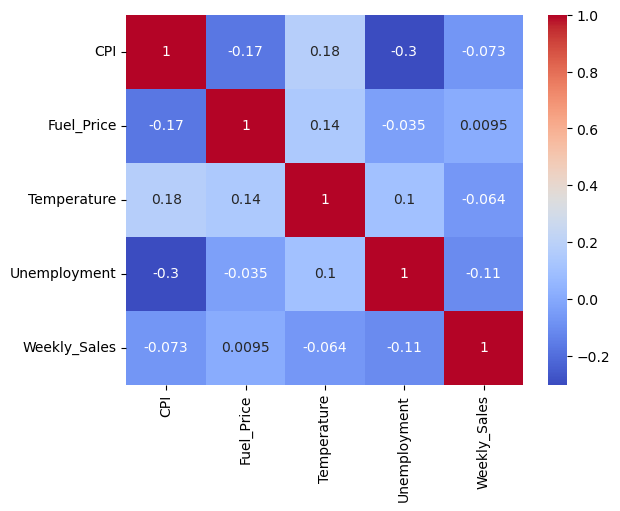

In [ ]:
FHdf=pd.read_csv('../data/raw/Walmart.csv')

cols = ["CPI","Fuel_Price","Temperature", "Unemployment", "Weekly_Sales"]
corr_matrix=FHdf[cols].corr()
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")


***Observation:***
From this heatmap, we can see that the correlation between sales revenue and CPI is negative and quite low. This means that as CPI, one of the inflation indexes, increases, sales revenue would slightly decrease. To decompose sales revenue as product prices times number of customer purchase, we can also say that as prices increase due to inflation, the number of customer purchase would slightly decrease during the inflationary time.

However, according to this heatmap, temperature would be one of the critical variables that would positively affect the sales revenue. This implies that customers are influenced by temperature.


C:\Users\fhykw\AppData\Local\Temp\ipykernel_12068\134978256.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  FHdf_cleaned['Date'] = pd.to_datetime(FHdf_cleaned['Date'])


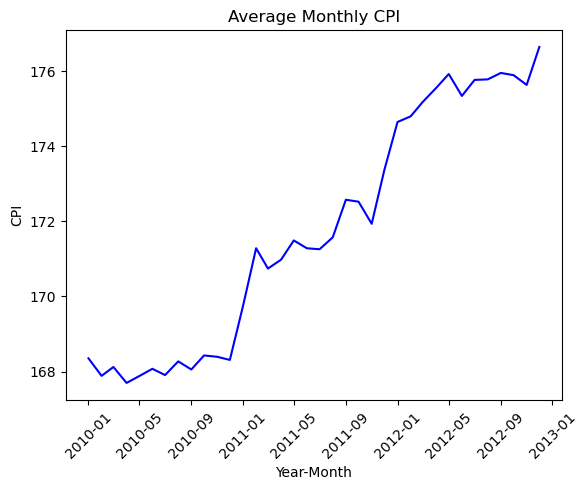

In [ ]:


FHdf_cleaned['Date'] = pd.to_datetime(FHdf_cleaned['Date'])

FHdf_cleaned['YearMonth'] = FHdf_cleaned['Date'].dt.strftime('%Y-%m')
average_cpi = FHdf_cleaned.groupby('YearMonth')['CPI'].mean().reset_index()
average_cpi['YearMonth'] = pd.to_datetime(average_cpi['YearMonth'])

# create a figure and axis object
fig, ax = plt.subplots()

# plot the line for average monthly CPI
ax.plot(average_cpi['YearMonth'], average_cpi['CPI'], color='blue', label='Average CPI')

# set the title and axis labels
ax.set_title('Average Monthly CPI')
ax.set_xlabel('Year-Month')
ax.set_ylabel('CPI')

# rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# show the plot
plt.show()



***Observation:*** 
The average monthly CPI has been increasing over the three years. In particular, the monthly CPI has increased dramatically in the last quarter of 2010 and 2011.


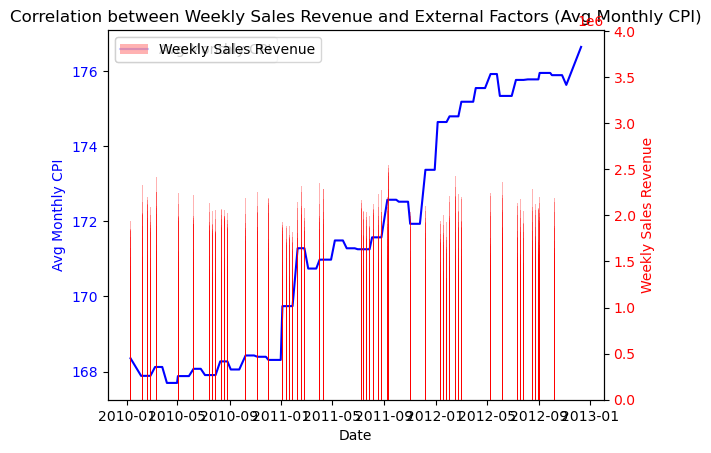

In [ ]:

# convert the "Revised_Date" column to datetime format
FHdf_cleaned['Date'] = pd.to_datetime(FHdf_cleaned['Date'])

# calculate the average monthly CPI and create a new column
FHdf_cleaned['Avg_Monthly_CPI'] = FHdf_cleaned.groupby(pd.Grouper(key='Revised_Date', freq='M'))['CPI'].transform('mean')

# create a figure and axis object
fig, ax1 = plt.subplots()

# plot the line for average monthly CPI
ax1.plot(FHdf_cleaned['Date'], FHdf_cleaned['Avg_Monthly_CPI'], color='blue', label='Avg Monthly CPI')
ax1.set_xlabel('Date')
ax1.set_ylabel('Avg Monthly CPI', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# create a second axis object for weekly sales revenue
ax2 = ax1.twinx()

# plot the bar chart for weekly sales revenue
ax2.bar(FHdf_cleaned['Date'], FHdf_cleaned['Weekly_Sales'], alpha=0.3, color='red', label='Weekly Sales Revenue')
ax2.set_ylabel('Weekly Sales Revenue', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# add a legend to the plot
ax1.legend(loc='upper left')
ax2.legend(loc="upper left")

# set the title
ax1.set_title('Correlation between Weekly Sales Revenue and External Factors (Avg Monthly CPI)')

# rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# show the plot
plt.show()


***Observation:***
Weekly sales have not changed too much, while the average monthly CPI has increased over the three years.

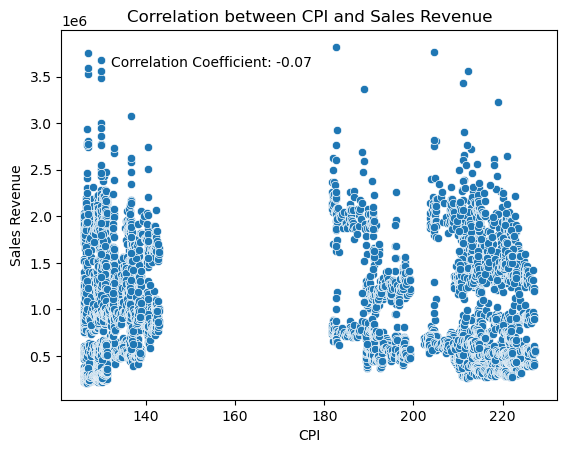

In [ ]:

# plot a scatter plot of CPI vs sales revenue
sns.scatterplot(x='CPI', y='Weekly_Sales', data=FHdf_cleaned)

# calculate the correlation coefficient between CPI and sales revenue
correlation_coefficient = FHdf_cleaned['CPI'].corr(FHdf_cleaned['Weekly_Sales'])

# add the correlation coefficient to the plot as text
plt.text(0.1, 0.9, f'Correlation Coefficient: {correlation_coefficient:.2f}', transform=plt.gca().transAxes)

# set the x-axis and y-axis labels
plt.xlabel('CPI')
plt.ylabel('Sales Revenue')

# set the title of the plot
plt.title('Correlation between CPI and Sales Revenue')

# show the plot
plt.show()

***Observation:***
Looking at the graph and the correlation coefficient (-0.07), we can see that the correlation between sales revenue and CPI is negative and quite low.


**Task2:Defining Research Questions**

I want to change my research question from **"To what extent does inflation affect consumer behavior? "** to **"To what extent does inflation and temperature affect consumer behavior?**

In this research, CPI is certainly one of the factors that would affect consumer behavior. However, the correlation between sales and CPI is negative and quite low. In other words, inflation does not affect consumers much because Walmart's goods are inelastic goods. Surprisingly, however, this research shows that temperature has a major impact on consumer behavior.

Therefore, I would like to include temperature in my research question to deepen my understanding of customer behavior by considering the micro and macro factors.
